In [1]:
import numpy as np 
from matplotlib import pyplot as plt

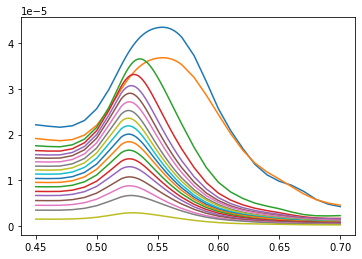

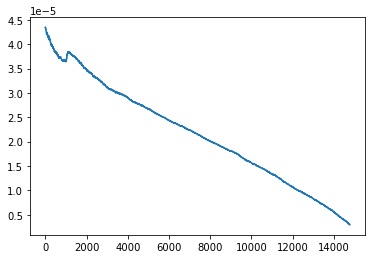

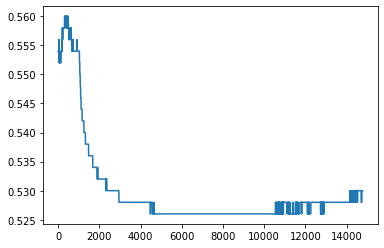

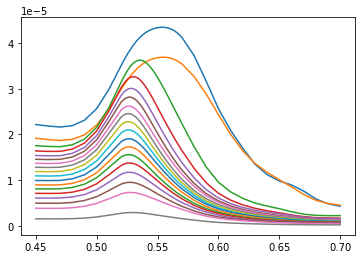

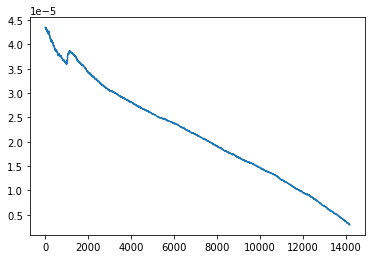

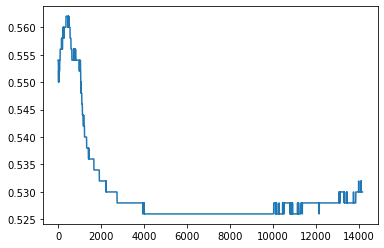

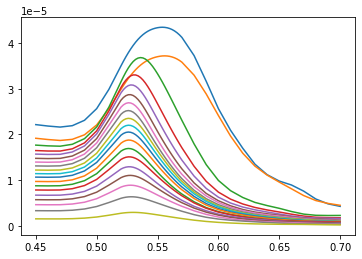

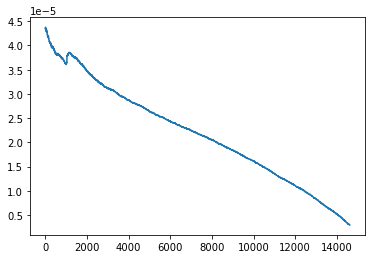

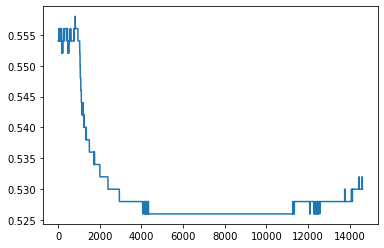

In [5]:
for index in range(1,4):
    data_path = f"./data{index}"
    rate = 10**6
    data2_extra = np.loadtxt(data_path+f'/C_cross_total2_{rate}_128_test_extra_points.csv',delimiter=',')
    data2 = np.loadtxt(data_path+f'/C_cross_total2_{rate}_128_test.csv',delimiter=',')
    data_total = np.vstack((data2,data2_extra))
    wavelength = np.concatenate((np.linspace(0.45,0.70,26),np.linspace(0.52,0.57,26)))
    wavelength = np.around(wavelength,3)
    r,_ = np.unique(wavelength,return_index=True)
    data_total = data_total[_]
    wavelength = wavelength[_]

    for i in range(int(data_total.shape[1]/800)):
        plt.plot(wavelength,data_total[:,800*i])
    plt.plot(wavelength,data_total[:,-1])
    plt.show()

    from scipy.interpolate import interp1d
    I = []
    wv= []
    sample_wavlength = np.linspace(0.45,0.70,1000)
    for i in range(int(data_total.shape[1])):
        f = interp1d(wavelength, data_total[:,i],'cubic')
        I.append(data_total[:,i].max())
        wv.append(wavelength[data_total[:,i] == data_total[:,i].max()].item())

    plt.plot(I)
    plt.show()

    plt.plot(wv)
    plt.show()
    
    np.savetxt(data_path+f'/combined_data{index}.csv',data_total,delimiter=',')